<a href="https://colab.research.google.com/github/hieu0902/Nguyen-Dinh-Minh-Hieu_20210345_Homework_Week_9/blob/main/HW1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Test**

In [ ]:
from sklearn import tree
X = [[0, 0],[2, 2]]
y = [0.5, 2.5]
clf = tree.DecisionTreeRegressor()
clf = clf.fit(X, y)
clf.predict([[1, 1]])


array([0.5])

# **1.1.Run example_dt_iris.py**


Plot the decision surface of a decision tree on the iris dataset

Plot the decision surface of a decision tree trained on pairs
of features of the iris dataset.

See :ref:`decision tree <tree>` for more information on the estimator.

For each pair of iris features, the decision tree learns decision
boundaries made of combinations of simple thresholding rules inferred from
the training samples.

This code was adapted from the example provided by scikit-learn, available at
http://scikit-learn.org/stable/auto_examples/tree/plot_iris.html#example-tree-plot-iris-py



<ipython-input-2-97c7fd353fb2>:82: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[idx, 0], X[idx, 1], c=color, label=iris.target_names[i],
<ipython-input-2-97c7fd353fb2>:82: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[idx, 0], X[idx, 1], c=color, label=iris.target_names[i],
<ipython-input-2-97c7fd353fb2>:82: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[idx, 0], X[idx, 1], c=color, label=iris.target_names[i],
<ipython-input-2-97c7fd353fb2>:82: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[idx, 0], X[idx, 1], c=color, label=iris.target_names[i],
<ipython-input-2-97c7fd353fb2>:82: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[idx, 0], X[idx, 1], c=color, label=iris.target_names[i],
<ipython-i

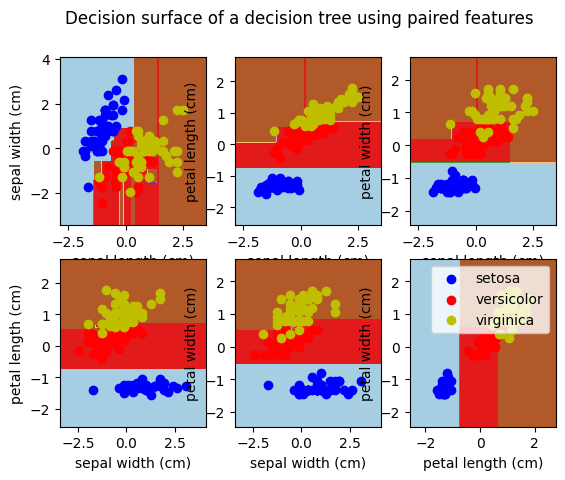

In [ ]:
"""
================================================================
Plot the decision surface of a decision tree on the iris dataset
================================================================

Plot the decision surface of a decision tree trained on pairs
of features of the iris dataset.

See :ref:`decision tree <tree>` for more information on the estimator.

For each pair of iris features, the decision tree learns decision
boundaries made of combinations of simple thresholding rules inferred from
the training samples.

This code was adapted from the example provided by scikit-learn, available at
http://scikit-learn.org/stable/auto_examples/tree/plot_iris.html#example-tree-plot-iris-py
"""
print(__doc__)

import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

# Parameters
n_classes = 3
plot_colors = "bry"
plot_step = 0.02

# Load data
iris = load_iris()

for pairidx, pair in enumerate([[0, 1], [0, 2], [0, 3],
                                [1, 2], [1, 3], [2, 3]]):
    # We only take the two corresponding features
    X = iris.data[:, pair]
    y = iris.target

    # Shuffle
    # <array>.shape returns the dimensions of the array
    # arange (start,stop,step) creates a 1-D vector
    idx = np.arange(X.shape[0])  # returns an array from 0 to X.shape[0], or 150
    np.random.seed(13)  # Seed the randomization
    np.random.shuffle(idx)  # Shuffle in place based on the seeded randomization

    X = X[idx]   # re-sort X randomly based on IDX as indices
    y = y[idx]

    # Standardize
    mean = X.mean(axis=0)    # Take the mean over the first axis (long axis)
    std = X.std(axis=0)
    X = (X - mean) / std   # Normalize to a 'normal distribution'

    # Train
    clf = DecisionTreeClassifier().fit(X, y)

    # Plot the decision boundary
    plt.subplot(2, 3, pairidx + 1)

    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

    # Meshgrid creates coordinate grid from vectors of coordinates
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))

    # Ravel creates a 1-D view of the vector
    # c_ concatenates 1D vectors into columns of a 2D array, basically
    #    making xx.ravel() column 0, yy.ravel() column 1
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=plt.cm.Paired)

    plt.xlabel(iris.feature_names[pair[0]])
    plt.ylabel(iris.feature_names[pair[1]])
    plt.axis("tight")

    # Plot the training points
    for i, color in zip(range(n_classes), plot_colors):
        idx = np.where(y == i)
        plt.scatter(X[idx, 0], X[idx, 1], c=color, label=iris.target_names[i],
                    cmap=plt.cm.Paired)

    plt.axis("tight")

plt.suptitle("Decision surface of a decision tree using paired features")
plt.legend()
plt.show()

# **1.3.Comparison Decision Tree**


In [16]:
'''
    TEMPLATE FOR MACHINE LEARNING HOMEWORK
    AUTHOR Eric Eaton, Chris Clingerman
'''
import math
import numpy as np
import matplotlib.pyplot as plt

from sklearn import tree
from sklearn.metrics import accuracy_score

numOfFoldsPerTrial = 10

def evaluatePerformance(numTrials=100):
    '''
    Evaluate the performance of decision trees,
    averaged over 1,000 trials of 10-fold cross validation

    Return:
      a matrix giving the performance that will contain the following entries:
      stats[0,0] = mean accuracy of decision tree
      stats[0,1] = std deviation of decision tree accuracy
      stats[1,0] = mean accuracy of decision stump
      stats[1,1] = std deviation of decision stump
      stats[2,0] = mean accuracy of 3-level decision tree
      stats[2,1] = std deviation of 3-level decision tree

    ** Note that your implementation must follow this API**
    '''

    # Load Data
    filename = "/SPECTF.dat"
    data = np.loadtxt(filename, delimiter=',')
    X = data[:, 1:]
    y = np.array([data[:, 0]]).T
    n,d = X.shape
    # create list to hold data
    treeAccuracies = []
    stumpAccuracies = []
    dt3Accuracies = []
    # perform 100 trials
    for x in range(0, numTrials):
        # shuffle the data
        idx = np.arange(n)
        np.random.seed(13)
        np.random.shuffle(idx)
        X = X[idx]
        y = y[idx]

        # split the data randomly into 10 folds
        folds = []
        intervalDivider = math.floor(len(X)/numOfFoldsPerTrial)
        for fold in range(0, numOfFoldsPerTrial):
            # designate a new testing range
            Xtest = X[fold * intervalDivider:(fold + 1) * intervalDivider,:]
            ytest = y[fold * intervalDivider:(fold + 1) * intervalDivider,:]
            Xtrain = X[:(fold * intervalDivider),:]
            ytrain = y[:(fold * intervalDivider),:]
            Xtrain = Xtrain.tolist()
            ytrain = ytrain.tolist()

            # complete the training data set so that it contains all
            # data except for the current test fold
            for dataRow in range((fold + 1) * intervalDivider, len(X)):
                Xtrain.append(X[dataRow])
                ytrain.append(y[dataRow])

            # train the decision tree
            clf = tree.DecisionTreeClassifier()
            clf = clf.fit(Xtrain,ytrain)

            # train the 1-level decision tree
            oneLevel = tree.DecisionTreeClassifier(max_depth=1)
            oneLevel = oneLevel.fit(Xtrain,ytrain)

            # train the 3-level decision tree
            threeLevel = tree.DecisionTreeClassifier(max_depth=3)
            threeLevel = threeLevel.fit(Xtrain,ytrain)

            # output predictions on the remaining data
            y_pred_tree = clf.predict(Xtest)
            y_pred_stump = oneLevel.predict(Xtest)
            y_pred_dt3 = threeLevel.predict(Xtest)

            # compute the training accuracy of the model and save to the
            # list of all accuracies
            treeAccuracies.append(accuracy_score(ytest, y_pred_tree))
            stumpAccuracies.append(accuracy_score(ytest, y_pred_stump))
            dt3Accuracies.append(accuracy_score(ytest, y_pred_dt3))

    # Update these statistics based on the results of your experiment
    meanDecisionTreeAccuracy = np.mean(treeAccuracies)
    stddevDecisionTreeAccuracy = np.std(treeAccuracies)
    meanDecisionStumpAccuracy = np.mean(stumpAccuracies)
    stddevDecisionStumpAccuracy = np.std(stumpAccuracies)
    meanDT3Accuracy = np.mean(dt3Accuracies)
    stddevDT3Accuracy = np.std(dt3Accuracies)


    # make certain that the return value matches the API specification
    stats = np.zeros((3,2))
    stats[0,0] = meanDecisionTreeAccuracy
    stats[0,1] = stddevDecisionTreeAccuracy
    stats[1,0] = meanDecisionStumpAccuracy
    stats[1,1] = stddevDecisionStumpAccuracy
    stats[2,0] = meanDT3Accuracy
    stats[2,1] = stddevDT3Accuracy
    return stats



# Do not modify from HERE...
if __name__ == "__main__":

    stats = evaluatePerformance(100)
    print ("Decision Tree Accuracy = ", stats[0,0], " (", stats[0,1], ")")
    print ("Decision Stump Accuracy = ", stats[1,0], " (", stats[1,1], ")")
    print ("3-level Decision Tree = ", stats[2,0], " (", stats[2,1], ")")
# ...to HERE.

Decision Tree Accuracy =  0.7377692307692308  ( 0.08700197236423018 )
Decision Stump Accuracy =  0.7936538461538462  ( 0.07507171127874686 )
3-level Decision Tree =  0.7582307692307693  ( 0.07940425368302748 )


# **1.4.Generating a Learning Curve**

[0.09763039 0.092506   0.09107412 0.08841804 0.08420599 0.08700388
 0.08309156 0.08299298 0.08410598 0.08533162]


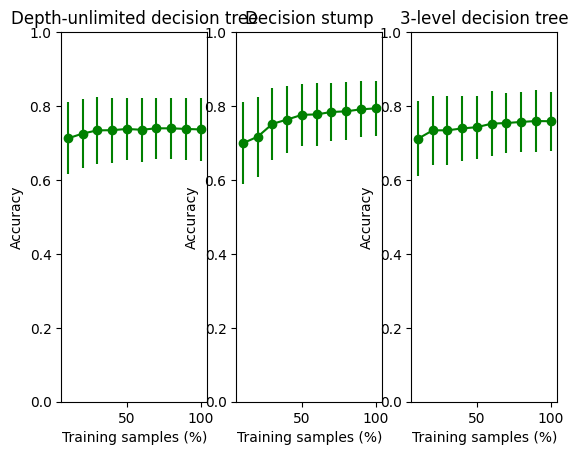

Decision Tree Accuracy =  0.7366923076923076  ( 0.08533161903480206 )
Decision Stump Accuracy =  0.7936538461538462  ( 0.07507171127874686 )
3-level Decision Tree =  0.7588846153846154  ( 0.07966868338579493 )


In [18]:
'''
    TEMPLATE FOR MACHINE LEARNING HOMEWORK
    AUTHOR Eric Eaton, Chris Clingerman
'''

import math
import numpy as np
import matplotlib.pyplot as plt

from sklearn import tree
from sklearn.metrics import accuracy_score

numOfFoldsPerTrial = 10

def evaluatePerformance(numTrials=100):
    '''
    Evaluate the performance of decision trees,
    averaged over 1,000 trials of 10-fold cross validation

    Return:
      a matrix giving the performance that will contain the following entries:
      stats[0,0] = mean accuracy of decision tree
      stats[0,1] = std deviation of decision tree accuracy
      stats[1,0] = mean accuracy of decision stump
      stats[1,1] = std deviation of decision stump
      stats[2,0] = mean accuracy of 3-level decision tree
      stats[2,1] = std deviation of 3-level decision tree

    ** Note that your implementation must follow this API**
    '''

    # Load Data
    filename = '/SPECTF.dat'
    data = np.loadtxt(filename, delimiter=',')
    X = data[:, 1:]
    y = np.array([data[:, 0]]).T
    n,d = X.shape

    # create list to hold data
    treeAccuracies = []
    stumpAccuracies = []
    dt3Accuracies = []

    tree_accuracies = np.zeros((10, numTrials*numOfFoldsPerTrial))
    stump_accuracies = np.zeros((10, numTrials*numOfFoldsPerTrial))
    dt3_accuracies = np.zeros((10, numTrials*numOfFoldsPerTrial))

    # perform 100 trials
    for x in range(0, numTrials):
        # shuffle the data
        idx = np.arange(n)
        np.random.seed(13)
        np.random.shuffle(idx)
        X = X[idx]
        y = y[idx]

        # split the data randomly into 10 folds
        folds = []
        intervalDivider = math.floor(len(X)/numOfFoldsPerTrial)
        for fold in range(0, numOfFoldsPerTrial):
            # designate a new testing range
            Xtest = X[fold * intervalDivider:(fold + 1) * intervalDivider,:]
            ytest = y[fold * intervalDivider:(fold + 1) * intervalDivider,:]
            Xtrain = X[:(fold * intervalDivider),:]
            ytrain = y[:(fold * intervalDivider),:]
            Xtrain = Xtrain.tolist()
            ytrain = ytrain.tolist()

            # complete the training data set so that it contains all
            # data except for the current test fold
            for dataRow in range((fold + 1) * intervalDivider, len(X)):
                Xtrain.append(X[dataRow])
                ytrain.append(y[dataRow])

            total_train = len(ytrain)
            total_test = len(ytest)
            for percent in range(10, 101, 10):
                n_train = math.floor(total_train * percent / 100)
                Xtrain_ = Xtrain[:n_train]
                ytrain_ = ytrain[:n_train]
                # print(Xtrain_)

                # train the decision tree
                clf = tree.DecisionTreeClassifier()
                clf = clf.fit(Xtrain_, ytrain_)

                # train the 1-level decision tree
                oneLevel = tree.DecisionTreeClassifier(max_depth=1)
                oneLevel = oneLevel.fit(Xtrain_, ytrain_)

                # train the 3-level decision tree
                threeLevel = tree.DecisionTreeClassifier(max_depth=3)
                threeLevel = threeLevel.fit(Xtrain_, ytrain_)

                # output predictions on the remaining data
                y_pred_tree = clf.predict(Xtest)
                y_pred_stump = oneLevel.predict(Xtest)
                y_pred_dt3 = threeLevel.predict(Xtest)

                # compute the training accuracy of the model
                tree_acc = accuracy_score(ytest, y_pred_tree)
                stump_acc = accuracy_score(ytest, y_pred_stump)
                dt3_acc = accuracy_score(ytest, y_pred_dt3)
                # save to the list of all accuracies
                if percent == 100:
                    treeAccuracies.append(tree_acc)
                    stumpAccuracies.append(stump_acc)
                    dt3Accuracies.append(dt3_acc)

                idx_percent = math.floor(percent / 10 - 1)
                idx_trial_fold = x * numOfFoldsPerTrial + fold
                tree_accuracies[idx_percent][idx_trial_fold] = tree_acc
                stump_accuracies[idx_percent][idx_trial_fold] = stump_acc
                dt3_accuracies[idx_percent][idx_trial_fold] = dt3_acc

    meanDecisionTreeAccuracies = np.mean(tree_accuracies, axis=1)
    stddevDecisionTreeAccuracies = np.std(tree_accuracies, axis=1)
    print(stddevDecisionTreeAccuracies)
    meanDecisionStumpAccuracies = np.mean(stump_accuracies, axis=1)
    stddevDecisionStumpAccuracies = np.std(stump_accuracies, axis=1)
    meanDT3Accuracies = np.mean(dt3_accuracies, axis=1)
    stddevDT3Accuracies = np.std(dt3_accuracies, axis=1)

    train_sizes = np.arange(10, 101, 10)
    fig, ax = plt.subplots(1, 3)
    plot_learning_curve(
        ax[0],
        train_sizes,
        meanDecisionTreeAccuracies,
        stddevDecisionTreeAccuracies,
        "Depth-unlimited decision tree"
    )
    plot_learning_curve(
        ax[1],
        train_sizes,
        meanDecisionStumpAccuracies,
        stddevDecisionStumpAccuracies,
        "Decision stump"
    )
    plot_learning_curve(
        ax[2],
        train_sizes,
        meanDT3Accuracies,
        stddevDT3Accuracies,
        "3-level decision tree"
    )
    plt.show()


    # Update these statistics based on the results of your experiment
    meanDecisionTreeAccuracy = np.mean(treeAccuracies)
    stddevDecisionTreeAccuracy = np.std(treeAccuracies)
    meanDecisionStumpAccuracy = np.mean(stumpAccuracies)
    stddevDecisionStumpAccuracy = np.std(stumpAccuracies)
    meanDT3Accuracy = np.mean(dt3Accuracies)
    stddevDT3Accuracy = np.std(dt3Accuracies)

    # make certain that the return value matches the API specification
    stats = np.zeros((3,2))
    stats[0,0] = meanDecisionTreeAccuracy
    stats[0,1] = stddevDecisionTreeAccuracy
    stats[1,0] = meanDecisionStumpAccuracy
    stats[1,1] = stddevDecisionStumpAccuracy
    stats[2,0] = meanDT3Accuracy
    stats[2,1] = stddevDT3Accuracy
    return stats


def plot_learning_curve(
    ax,
    train_sizes,
    mean_accuracies,
    stddev_accuracies,
    title: str
):
    """Plot learning curve."""

    ax.set_xlabel("Training samples (%)")
    ax.set_ylabel("Accuracy")
    ax.errorbar(
        train_sizes,
        mean_accuracies,
        yerr=stddev_accuracies,
        fmt='-o',
        color='g',
        label="Standard deviation of test accuracies"
    )
    ax.set_title(title)
    ax.set_ylim(bottom=0, top=1.0)


# Do not modify from HERE...
if __name__ == "__main__":
    stats = evaluatePerformance(100)
    print ("Decision Tree Accuracy = ", stats[0,0], " (", stats[0,1], ")")
    print ("Decision Stump Accuracy = ", stats[1,0], " (", stats[1,1], ")")
    print ("3-level Decision Tree = ", stats[2,0], " (", stats[2,1], ")")
# ...to HERE.